Setup and import

In [72]:
import numpy as np
from scipy.optimize import fsolve
from sympy import primepi
import matplotlib.pyplot as plt
import mpmath
import csv
import scipy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.optimize import leastsq
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Equation

In [73]:
def equation(x, a, pi_a):
    argument = a - a / (x * np.pi / 2)
    if argument <= 0:
        return np.nan
    result = pi_a - a / np.log(argument)
    return float(result)


In [94]:
# Define the range and step size for a
a_start = 10**9
a_end =   10**9+1000
a_step =  1

# Generate values for a
a_values = np.arange(a_start, a_end + a_step, a_step)

# Arrays to hold the results
x_solutions = []
f_values = []
abs_li_minus_pi_values = []
abs_f_minus_pi_values = []

# Compute x for each value of a
prime_pi=[]
index=0
for a in a_values:
    pi_a = primepi(a)
    prime_pi.append(pi_a)
    # Use fsolve to find the root of the equation
    x_initial_guess = 1
    x_solution, = fsolve(equation, x_initial_guess, args=(a, pi_a))
    print(a, x_solution)
    x_solutions.append(x_solution)

    # Calculate the modified f(x) using the solution x
    if x_solution > 0:  # Ensure x_solution is positive
        f_x = a / np.log(a - a / (x_solution * np.pi / 2))
    else:
        f_x = np.nan

    f_values.append(f_x)

    # Calculate Li(x) using mpmath
    li_x = mpmath.li(a)

    abs_li_minus_pi = np.abs(li_x - pi_a)
    abs_f_minus_pi = np.abs(f_x - pi_a)

    abs_li_minus_pi_values.append(abs_li_minus_pi)
    abs_f_minus_pi_values.append(abs_f_minus_pi)


/tmp/ipykernel_7610/3760628940.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(result)


1000000000 0.9758506042735773
1000000001 0.9758506139801201
1000000002 0.9758506236866643
1000000003 0.9758506333932101
1000000004 0.9758506430997543
1000000005 0.9758506528062995
1000000006 0.9758506625128456
1000000007 0.9758504710978096
1000000008 0.9758504808043482
1000000009 0.9758502893894576
1000000010 0.9758502990959891
1000000011 0.9758503088025205
1000000012 0.9758503185090521
1000000013 0.9758503282155848
1000000014 0.9758503379221178
1000000015 0.9758503476286506
1000000016 0.9758503573351849
1000000017 0.9758503670417192
1000000018 0.9758503767482529
1000000019 0.9758503864547879
1000000020 0.9758503961613232
1000000021 0.9758502047465012
1000000022 0.9758502144530316
1000000023 0.9758502241595571
1000000024 0.9758502338660857
1000000025 0.9758502435726158
1000000026 0.9758502532791444
1000000027 0.9758502629856759
1000000028 0.9758502726922059
1000000029 0.975850282398736
1000000030 0.9758502921052672
1000000031 0.975850301811799
1000000032 0.975850311518329
1000000033 0.

In [95]:
# Perform linear regression on x_solutions based on a_values
slope, intercept = np.polyfit(a_values, x_solutions, 1)
print(f"Linear regression equation: x = {slope:.32f} * a + {intercept:.32f}")


Linear regression equation: x = -0.00000000005491236477234475671233 * a + 1.03076261659425916228371988836443


In [96]:
def logarithmic_regression(x, a):
    def model(params, x):
        c, d = params
        return c + d * np.log(x)

    def objective(params, x, y):
        return model(params, x) - y

    # Initial guess for parameters (c, d)
    initial_params = [0, 1]

    # Solve for parameters using nonlinear least squares
    params, _ = scipy.optimize.leastsq(objective, initial_params, args=(x, a))

    return params

# Perform logarithmic regression on x_solutions based on a_values
log_params = logarithmic_regression(a_values, np.array(x_solutions))
log_predictions = log_params[0] + log_params[1] * np.log(a_values)
log_params[1]
print(f"Logarithmic regression equation: x = {log_params[0]:.15f} + {log_params[1]:.15f} * log(a)")

Logarithmic regression equation: x = 2.055409027452202 + -0.052094046639845 * log(a)


Compute R^2 for log predictions

In [97]:
r2_log = r2_score(x_solutions, log_predictions)
print(f"R-squared for Logarithmic Regression: {r2_log:.12f}")

R-squared for Logarithmic Regression: 0.002635559987


Compute Mean Squared Error for the logarithmic regression

In [98]:
# Compute Mean Squared Error for the logarithmic regression
mse_log = mean_squared_error(x_solutions, log_predictions)
print(f"Mean Squared Error for Logarithmic Regression: {mse_log:.12f}")

Mean Squared Error for Logarithmic Regression: 0.000000000000


In [99]:
# Compute Root Mean Squared Error for the logarithmic regression
rmse_log = np.sqrt(mse_log)
print(f"Root Mean Squared Error for Logarithmic Regression: {rmse_log:.12f}")

Root Mean Squared Error for Logarithmic Regression: 0.000000308270


In [100]:
def transformed_function(a, slope, intercept):
    x = slope * a + intercept
    if a - (0.6366197724 * a) / x <= 0:
        return np.nan
    pi=np.pi
    return primepi(a) - (a / np.log(a - (0.6366197724 * a) / x))


In [101]:
def transformed_function_log(a, p1, p2):
    x = p1+ p2*np.log(a)
    if a - (0.6366197724 * a) / x <= 0:
        return np.nan
    pi=np.pi
    return primepi(a) - (a / np.log(a - (0.6366197724 * a) / x))

In [102]:
transformed_values = [transformed_function(a, slope, intercept) for a in a_values]
transformed_values_log = [transformed_function_log(a, log_params[0], log_params[1]) for a in a_values]

The equation of the fitted quadratic polynomial is: y = 0.35314855920992604954022908714251 + -0.00000000000000000000000000017670*x + -0.00000000000000000035339430199090*x^2
Mean Squared Error: 2.34933490519321
R-squared: 1.7763568394002505e-14
Mean Squared Error: 2.34933489012091
R-squared: 6.9782559447562065e-06


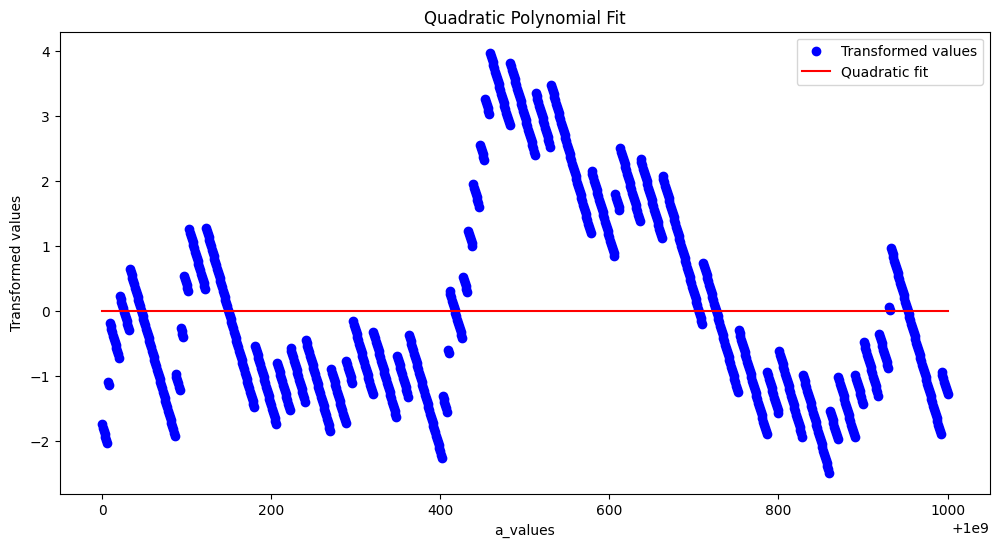

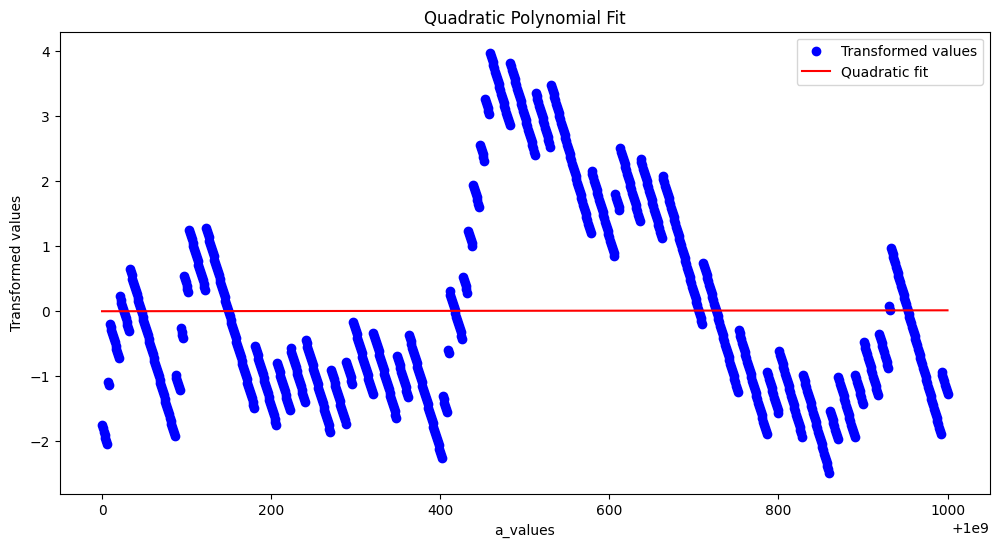

In [115]:
X = a_values.reshape(-1, 1)

# Create quadratic features (x and x^2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, transformed_values)

# Predict the transformed values
y_pred = model.predict(X_poly)

#fit log

poly3 = PolynomialFeatures(degree=3)
X_poly = poly3.fit_transform(X)

# Fit the model
model2 = LinearRegression()

model2.fit(X_poly, transformed_values_log)

# Predict the transformed values
y_pred2 = model2.predict(X_poly)

# Evaluate the model
mse = mean_squared_error(transformed_values, y_pred)
r2 = r2_score(transformed_values, y_pred)
beta_0 = model.intercept_  # Intercept (β_0)
beta_1, beta_2 = model.coef_[1:]  # Coefficients for x and x^2 (β_1 and β_2)

# Print the quadratic equation
print(f"The equation of the fitted quadratic polynomial is: y = {beta_0:.32f} + {beta_1:.32f}*x + {beta_2:.32f}*x^2")

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



mse = mean_squared_error(transformed_values_log, y_pred2)
r2 = r2_score(transformed_values_log, y_pred2)
#beta_0 = model2.intercept_  # Intercept (β_0)
#beta_1, beta_2 = model.coef_[1:]

#print(f"The equation of the fitted quadratic polynomial is: y = {beta_0:.32f} + {beta_1:.32f}*x + {beta_2:.32f}*x^2")

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(a_values, transformed_values, color='blue', label='Transformed values')
plt.plot(a_values, y_pred, color='red', label='Quadratic fit')
plt.xlabel('a_values')
plt.ylabel('Transformed values')
plt.title('Quadratic Polynomial Fit')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(a_values, transformed_values_log, color='blue', label='Transformed values')
plt.plot(a_values, y_pred2, color='red', label='Quadratic fit')
plt.xlabel('a_values')
plt.ylabel('Transformed values')
plt.title('Quadratic Polynomial Fit')
plt.legend()
plt.show()

In [104]:
# Save the results to a CSV file
print(str(a_start))
csv_filename = f"results from {a_start} to {a_end}.csv"
print(csv_filename)
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['a', 'x_solution', 'f(x)', '|Li(x) - pi(x)|', '|f(x) - pi(x)|'])
    for a, x_solution, f_x, li_minus_pi, f_minus_pi in zip(a_values, x_solutions, f_values, abs_li_minus_pi_values, abs_f_minus_pi_values):
        writer.writerow([a, x_solution, f_x, li_minus_pi, f_minus_pi])

print(f"Results saved to {csv_filename}")


1000000000
results from 1000000000 to 1000001000.csv
Results saved to results from 1000000000 to 1000001000.csv


In [106]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Number of observations and predictors
n = len(a_values)
p = 1  # Only one predictor in logarithmic regression

adj_r2_log = adjusted_r2(r2_log, n, p)
print(f"Adjusted R-squared for Logarithmic Regression: {adj_r2_log:.32f}")
from scipy import stats
residuals_log = np.array(x_solutions) - np.array(log_predictions)
# Compute F-statistic and p-value
ss_res = np.sum(residuals_log ** 2)
ss_tot = np.sum((np.array(x_solutions) - np.mean(x_solutions)) ** 2)
f_statistic = (ss_tot - ss_res) / p / (ss_res / (n - p - 1))
p_value = 1 - stats.f.cdf(f_statistic, p, n - p - 1)
print(f"R-squared for Logarithmic Regression: {r2_log:.32}")
print(f"Mean Squared Error for Logarithmic Regression: {mse_log:.32}")
print(f"Root Mean Squared Error for Logarithmic Regression: {rmse_log:.32}")
print(f"F-statistic for Logarithmic Regression: {f_statistic:.32}")
print(f"P-value for F-statistic: {p_value:.32f}")

Adjusted R-squared for Logarithmic Regression: 0.00163719718462718155649326945422
R-squared for Logarithmic Regression: 0.0026355599874425816864231819636188
Mean Squared Error for Logarithmic Regression: 9.5030541132231070985556324815673e-14
Root Mean Squared Error for Logarithmic Regression: 3.0827024042588198915831551073785e-07
F-statistic for Logarithmic Regression: 2.6398819948122151934910561976722
P-value for F-statistic: 0.10452671361952003969975066866027


In [107]:
print(f"Logarithmic regression equation: x = {log_params[0]:.32f} + {log_params[1]:.32f} * log(a)")

"""Compute R^2 for log predictions"""

r2_log = r2_score(x_solutions, log_predictions)
print(f"R-squared for Logarithmic Regression: {r2_log:.32f}")

"""Compute Mean Squared Error for the logarithmic regression"""

# Compute Mean Squared Error for the logarithmic regression
mse_log = mean_squared_error(x_solutions, log_predictions)
print(f"Mean Squared Error for Logarithmic Regression: {mse_log:.32f}")

# Compute Root Mean Squared Error for the logarithmic regression
rmse_log = np.sqrt(mse_log)
print(f"Root Mean Squared Error for Logarithmic Regression: {rmse_log:.32f}")

Logarithmic regression equation: x = 2.05540902745220188663211047241930 + -0.05209404663984452260594437689178 * log(a)
R-squared for Logarithmic Regression: 0.00263555998744258168642318196362
Mean Squared Error for Logarithmic Regression: 0.00000000000009503054113223107099
Root Mean Squared Error for Logarithmic Regression: 0.00000030827024042588198915831551


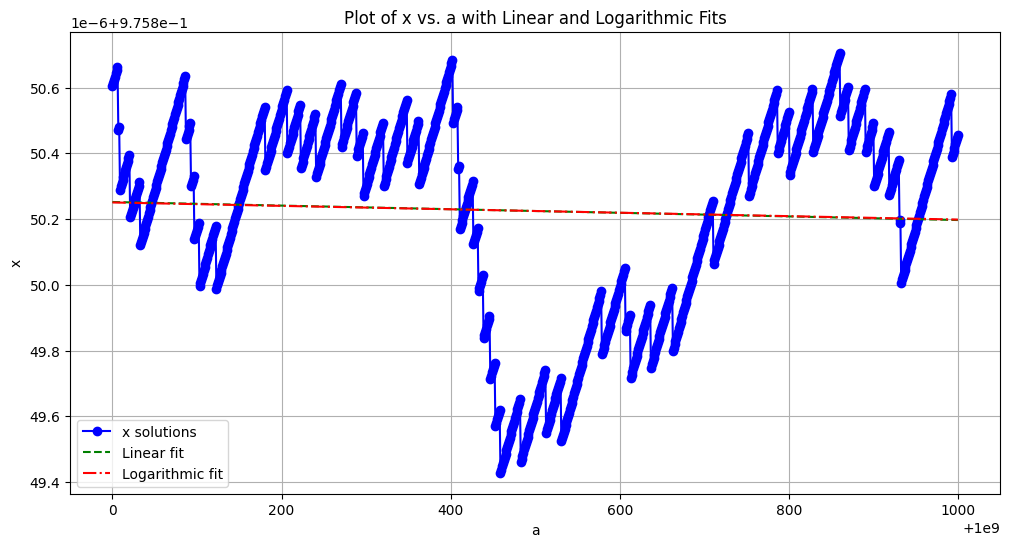

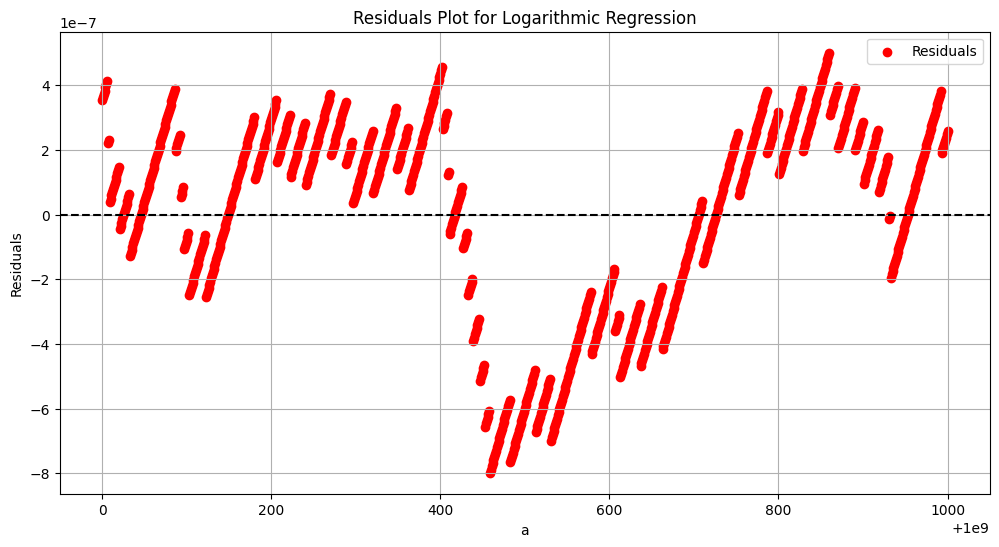

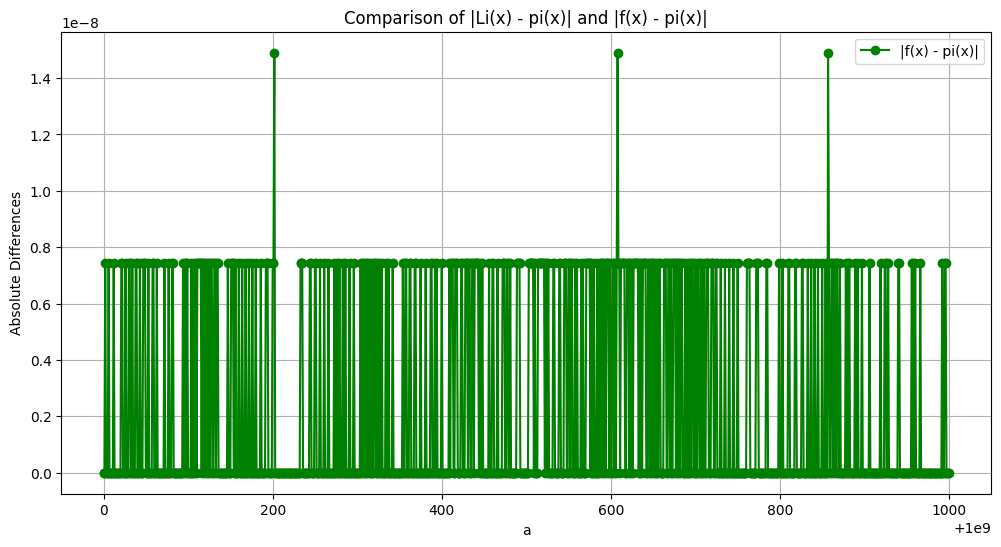

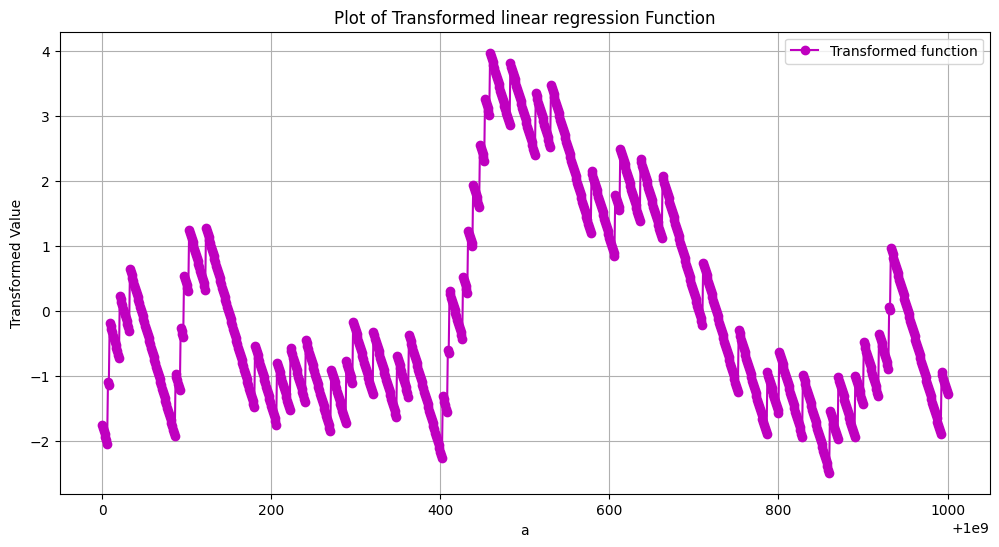

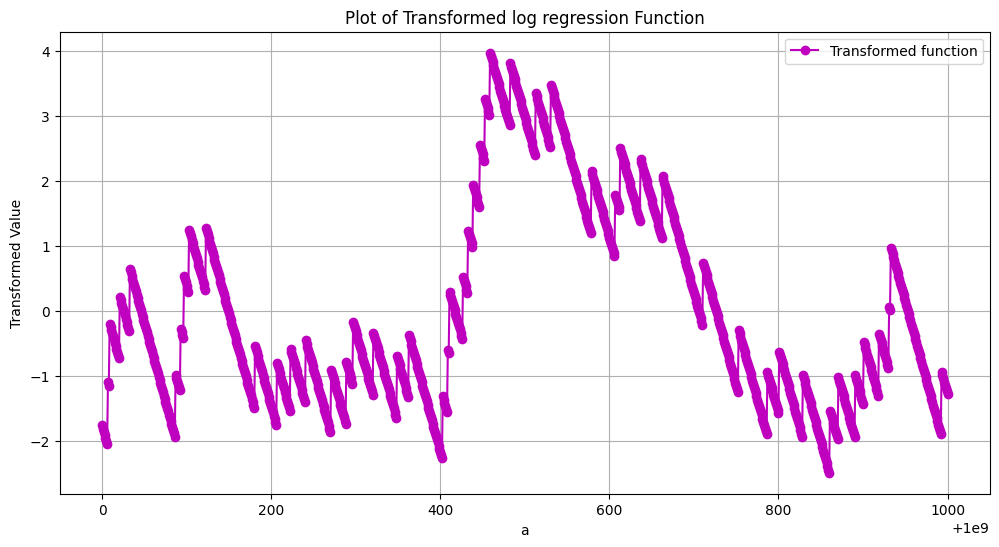

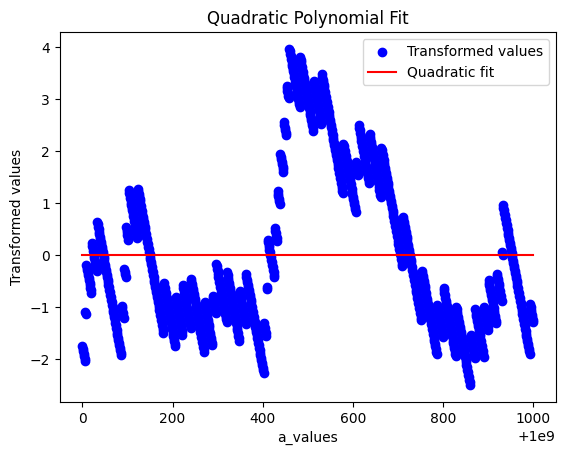

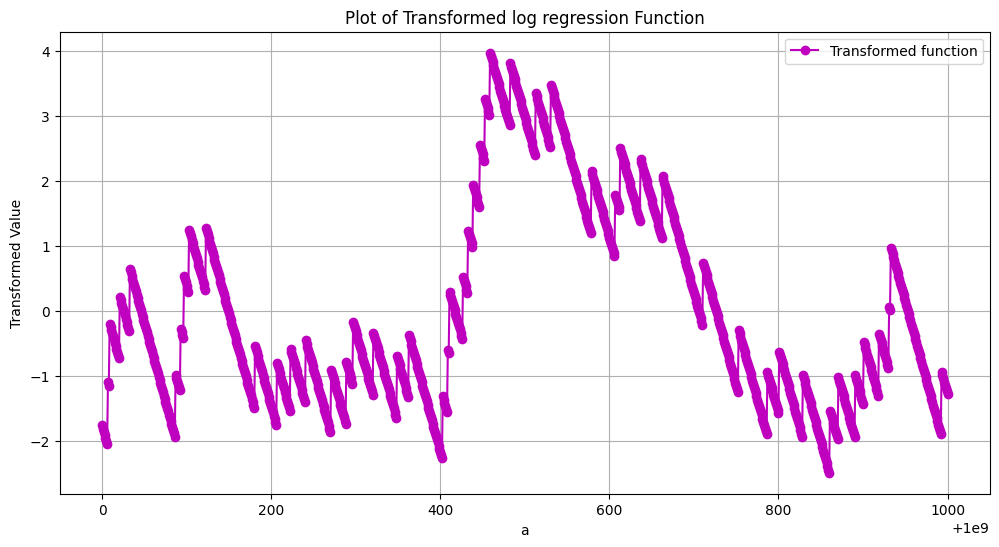

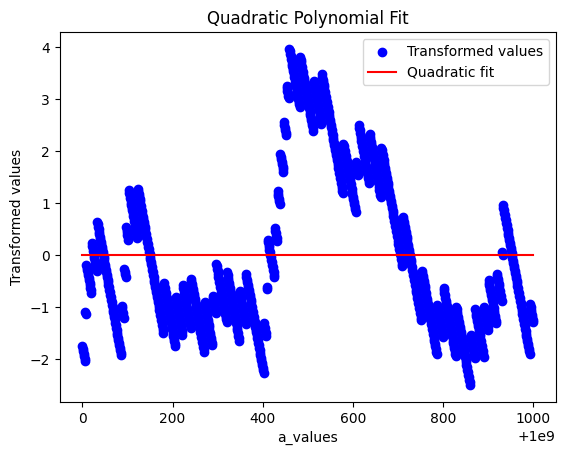

In [108]:

# Plot the linear regression line
plt.figure(figsize=(12, 6))
plt.plot(a_values, x_solutions, marker='o', linestyle='-', color='b', label='x solutions')
plt.plot(a_values, slope * a_values + intercept, linestyle='--', color='g', label='Linear fit')
plt.plot(a_values, log_predictions, linestyle='-.', color='r', label='Logarithmic fit')
plt.xlabel('a')
plt.ylabel('x')
plt.title('Plot of x vs. a with Linear and Logarithmic Fits')
plt.legend()
plt.grid(True)
plt.show()

# Compute residuals
residuals_log = np.array(x_solutions) - np.array(log_predictions)

# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(a_values, residuals_log, marker='o',linestyle='-', color='r', label='Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('a')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Logarithmic Regression')
plt.legend()
plt.grid(True)
plt.show()


# Plotting |Li(x) - pi(x)| and |f(x) - pi(x)| on the same graph
plt.figure(figsize=(12, 6))
#plt.plot(a_values, abs_li_minus_pi_values, marker='o', linestyle='-', color='r', label='|Li(x) - pi(x)|')
plt.plot(a_values, abs_f_minus_pi_values, marker='o', linestyle='-', color='g', label='|f(x) - pi(x)|')
plt.xlabel('a')
plt.ylabel('Absolute Differences')
plt.title('Comparison of |Li(x) - pi(x)| and |f(x) - pi(x)|')
plt.legend()
plt.grid(True)
plt.show()

# Plot the transformed function
plt.figure(figsize=(12, 6))
plt.plot(a_values, transformed_values, marker='o', linestyle='-', color='m', label='Transformed function')
plt.xlabel('a')
plt.ylabel('Transformed Value')
plt.title('Plot of Transformed linear regression Function')
plt.grid(True)
plt.legend()
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(a_values, transformed_values_log, marker='o', linestyle='-', color='m', label='Transformed function')
plt.xlabel('a')
plt.ylabel('Transformed Value')
plt.title('Plot of Transformed log regression Function')
plt.grid(True)
plt.legend()
plt.show()
plt.scatter(a_values, transformed_values, color='blue', label='Transformed values')
plt.plot(a_values, y_pred, color='red', label='Quadratic fit')
plt.xlabel('a_values')
plt.ylabel('Transformed values')
plt.title('Quadratic Polynomial Fit')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(a_values, transformed_values_log, marker='o', linestyle='-', color='m', label='Transformed function')
plt.xlabel('a')
plt.ylabel('Transformed Value')
plt.title('Plot of Transformed log regression Function')
plt.grid(True)
plt.legend()
plt.show()
plt.scatter(a_values, transformed_values, color='blue', label='Transformed values')
plt.plot(a_values, y_pred, color='red', label='Quadratic fit')
plt.xlabel('a_values')
plt.ylabel('Transformed values')
plt.title('Quadratic Polynomial Fit')
plt.legend()
plt.show()

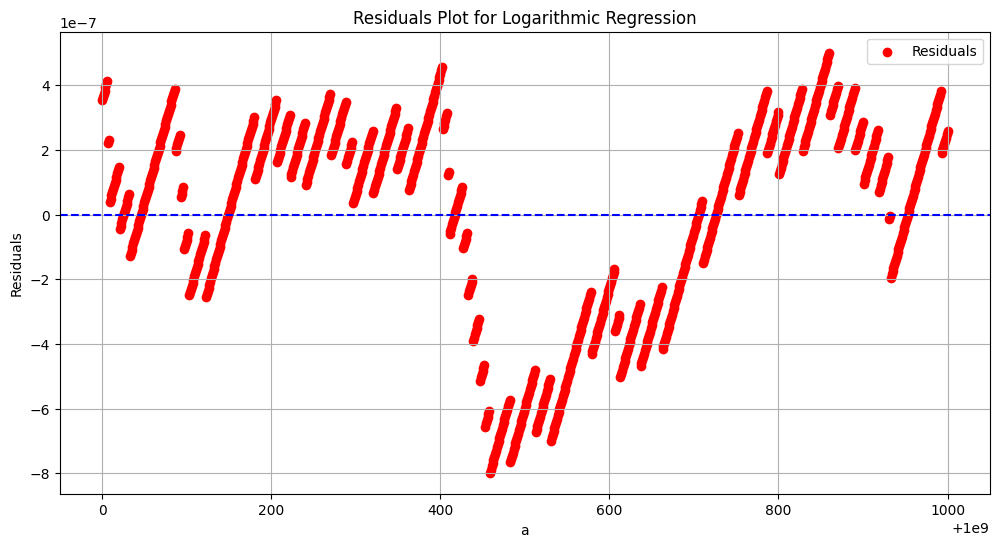

In [109]:
# Compute residuals
residuals_log = np.array(x_solutions) - np.array(log_predictions)

# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(a_values, residuals_log, marker='o',linestyle='-', color='r', label='Residuals')
plt.axhline(y=0, color='b', linestyle='--')
plt.xlabel('a')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Logarithmic Regression')
plt.legend()
plt.grid(True)
plt.show()

3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0
3.1 3.0 10.0

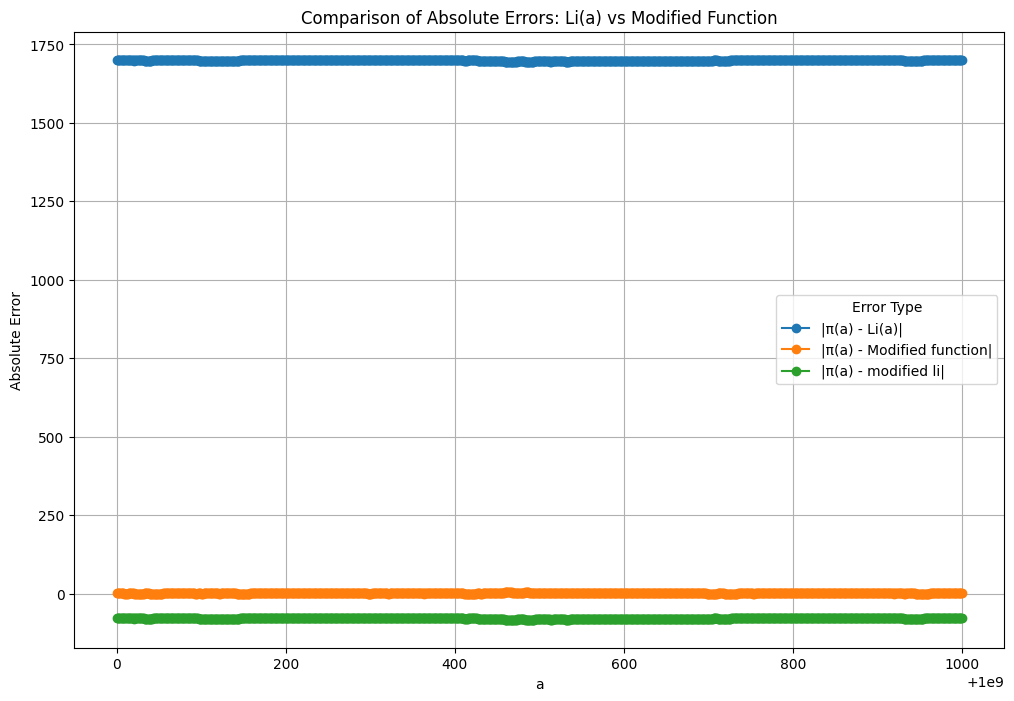

In [110]:
import mpmath

# Define the logarithmic integral function
def li(x):
    return mpmath.li(x)

def most_left_digit_math(num):
    num = abs(num)  # Work with the absolute value
    while num >= 10:
        num //= 10  # Integer division by 10
    return int(num) 

# Define the modified function based on your previous code
def modified_function2(a, rg):
    argument = a - a / (rg * np.pi / 2)
    if argument <= 0:
        return np.nan
    return  (a / np.log(argument))

# Arrays to hold the results
li_errors = []
mod_errors = []
diff_li=[]
li_errors2=[]
# Use your computed regression factor


# Compute errors for each value of x
index=0
for a, x in zip(a_values, x_solutions):
    pi_x = prime_pi[index]
    li_x = li(a)
    rg = log_params[0] + log_params[1] * np.log(a)
    mod_x = modified_function2(a, rg)
    #xlnx=a/(np.log(a))
    #diff_li.append(li_x-xlnx)
    first_digit=most_left_digit_math(a)
    minus_num=np.floor((np.floor(np.log10(a))+1)/3)#np.floor(np.log10(a)-2)
    print(minus_num+first_digit/10,minus_num,np.floor(np.log10(a)+1))
    """if first_digit==1:
        li_errors2.append(li_x-pi_x-10**(minus_num+first_digit/20))"""
    if first_digit>4:
        li_errors2.append(li_x-pi_x-10**(minus_num+first_digit/8))
    else:
        li_errors2.append(li_x-pi_x-10**(minus_num+first_digit/4))
    li_errors.append(li_x-pi_x)
    mod_errors.append(abs(pi_x - mod_x))
    index+=1
print("li  errors values:",li_errors)
print("li modified errors values:",li_errors2)
# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(a_values, li_errors,marker="o", label='|π(a) - Li(a)|')
plt.plot(a_values, mod_errors,marker="o", label='|π(a) - Modified function|')
plt.plot(a_values, li_errors2,marker="o", label='|π(a) - modified li|')

plt.title('Comparison of Absolute Errors: Li(a) vs Modified Function')
plt.xlabel('a')
plt.ylabel('Absolute Error')
plt.legend(title='Error Type')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig(f'error_comparison_plot {a_start} to {a_end}.png', dpi=300, bbox_inches='tight')

# Display the plot (optional, if you're running this in an environment that can show plots)
plt.show()

R-squared: 0.016412011223619127
Mean Squared Error: 0.6876234587158183
Root Mean Squared Error: 0.8292306426536699
Linear Regression Equation: y = -370685.08409644576022401452064514160156 + 0.00037068618337556983677663624555 * x


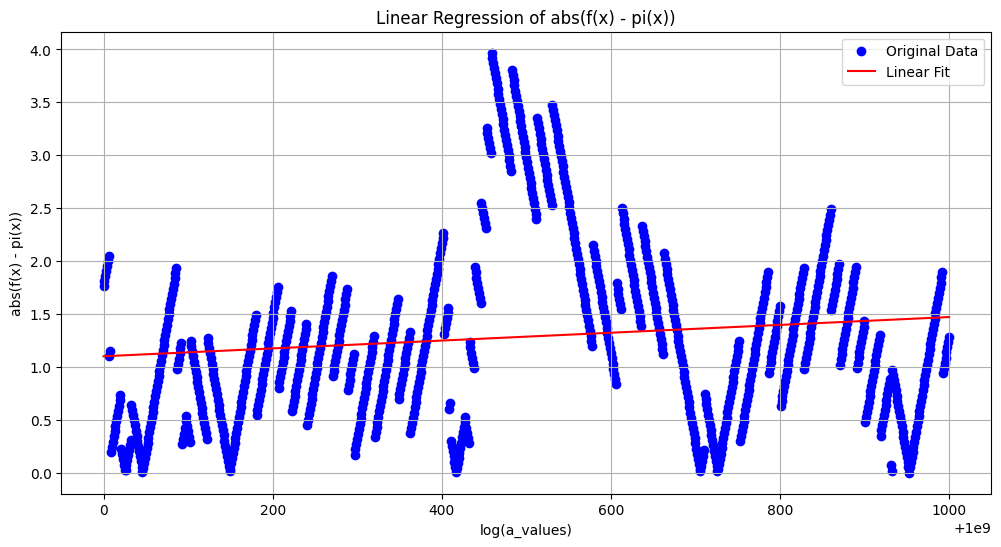

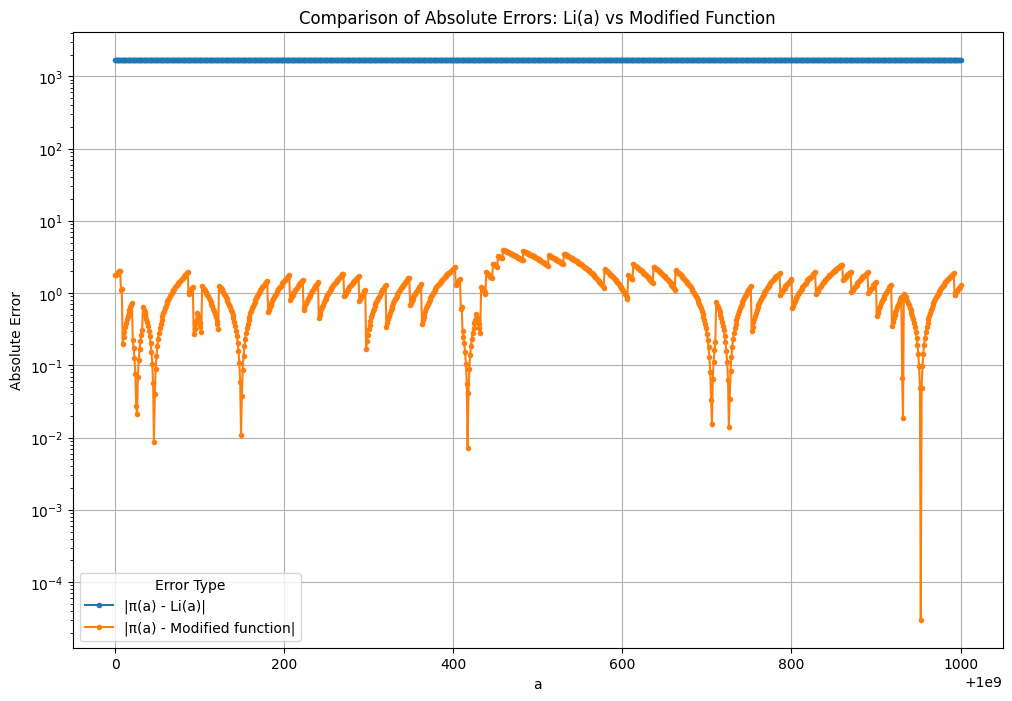

In [111]:


# Transform a_values to log scale and reshape for sklearn
log_a_values=a_values.reshape(-1, 1)
# Ensure that abs(f(x) - pi(x)) is in a numpy array and reshaped for sklearn
y_values = np.array(mod_errors).reshape(-1, 1)

# Create a LinearRegression model
lin_reg = LinearRegression()

# Fit the model to the log-transformed data
lin_reg.fit(log_a_values, y_values)

# Get the predictions
y_pred = lin_reg.predict(log_a_values)

# Check for NaN or Inf in y_pred
if np.any(np.isnan(y_pred)) or np.any(np.isinf(y_pred)):
    raise ValueError("y_pred contains NaN or Inf values")

# Flatten y_values and y_pred for metrics calculations
y_values = np.ravel(y_values)
y_pred = np.ravel(y_pred)

# Calculate R-squared
r2 = r2_score(y_values, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_values, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

intercept = lin_reg.intercept_[0]
slope = lin_reg.coef_[0][0]
print(f"Linear Regression Equation: y = {intercept:.32f} + {slope:.32f} * x")

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(log_a_values, y_values, color='blue', label='Original Data')
plt.plot(log_a_values, y_pred, color='red', label='Linear Fit')
plt.xlabel('log(a_values)')
plt.ylabel('abs(f(x) - pi(x))')
plt.title('Linear Regression of abs(f(x) - pi(x))')
plt.legend()
plt.grid(True)



# Create the plot"""
plt.figure(figsize=(12, 8))
plt.semilogy(a_values, li_errors,marker=".", label='|π(a) - Li(a)|')
plt.semilogy(a_values, mod_errors,marker=".", label='|π(a) - Modified function|')


plt.title('Comparison of Absolute Errors: Li(a) vs Modified Function')
plt.xlabel('a')
plt.ylabel('Absolute Error')
plt.legend(title='Error Type')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('error_comparison_plot ${a_start} to ${a_end} .png', dpi=300, bbox_inches='tight')

# Display the plot (optional, if you're running this in an environment that can show plots)
plt.show()

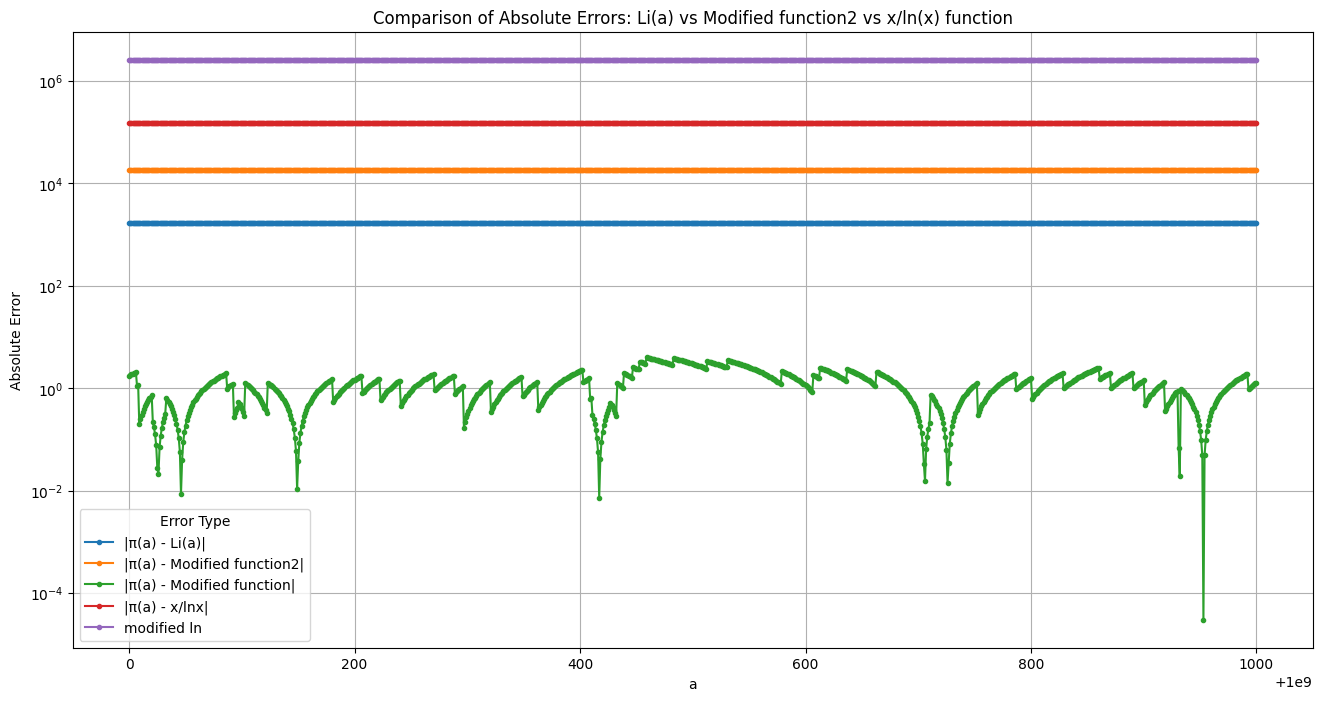

In [112]:
mod_errors2=[]
mod_ln=[]
mod_ln_ln2=[]
index=0


for a, x in zip(a_values, x_solutions):
    pi_x = prime_pi[index]
    rg = log_params[0] + log_params[1] * np.log(a)
    # y = {beta_0:.32f} + {beta_1:.32f}*x + {beta_2:.32f}*x^2")
    rg=0.00000000000002707791861318303864 * a + 0.97951396382809330365404321128153
    mod_x = modified_function2(a, rg)+(beta_0 + beta_1*a + beta_2*a**2)

    mod_errors2.append(abs(pi_x - mod_x))
    lnFunc=a/(np.log(a)-1)
    lnFunc2=a/(np.log(a)-2)
    mod_ln.append(abs(pi_x - lnFunc))
    mod_ln_ln2.append(abs(pi_x - lnFunc2))
    index+=1
plt.figure(figsize=(16, 8))
plt.semilogy(a_values, li_errors,marker='.', label='|π(a) - Li(a)|')
plt.semilogy(a_values, mod_errors2,marker='.', label='|π(a) - Modified function2|')
plt.semilogy(a_values, mod_errors,marker='.', label='|π(a) - Modified function|')
plt.semilogy(a_values, mod_ln,marker=".", label='|π(a) - x/lnx|')
plt.semilogy(a_values, mod_ln_ln2,marker=".", label='modified ln')

plt.title('Comparison of Absolute Errors: Li(a) vs Modified function2 vs x/ln(x) function')
plt.xlabel('a')
plt.ylabel('Absolute Error')
plt.legend(title='Error Type')
plt.grid(True)
# Save the plot as a PNG file
plt.savefig('error_comparison_plot.png', dpi=300, bbox_inches='tight')

# Display the plot (optional, if you're running this in an environment that can show plots)
plt.show()

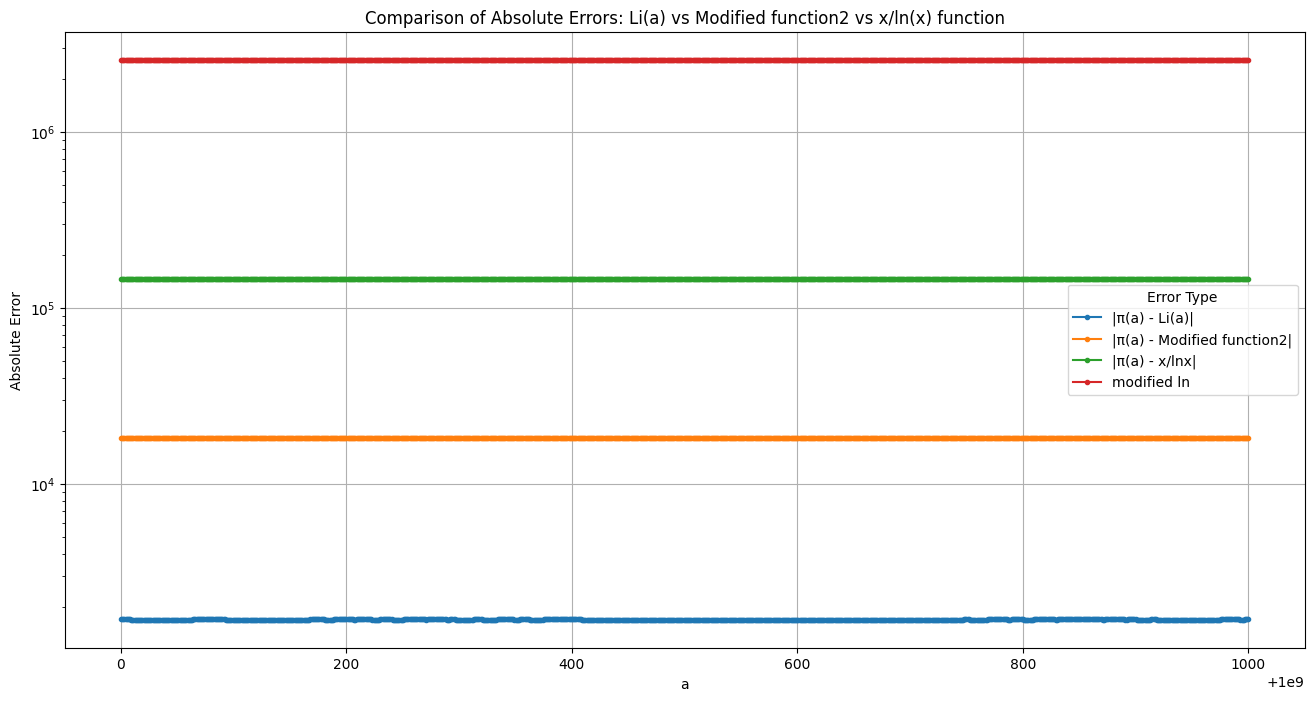

In [113]:
plt.figure(figsize=(16, 8))
plt.semilogy(a_values, li_errors,marker='.', label='|π(a) - Li(a)|')
plt.semilogy(a_values, mod_errors2,marker='.', label='|π(a) - Modified function2|')
plt.semilogy(a_values, mod_ln,marker=".", label='|π(a) - x/lnx|')
plt.semilogy(a_values, mod_ln_ln2,marker=".", label='modified ln')

plt.title('Comparison of Absolute Errors: Li(a) vs Modified function2 vs x/ln(x) function')
plt.xlabel('a')
plt.ylabel('Absolute Error')
plt.legend(title='Error Type')
plt.grid(True)
# Save the plot as a PNG file
plt.savefig('error_comparison_plot.png', dpi=300, bbox_inches='tight')

# Display the plot (optional, if you're running this in an environment that can show plots)
plt.show()

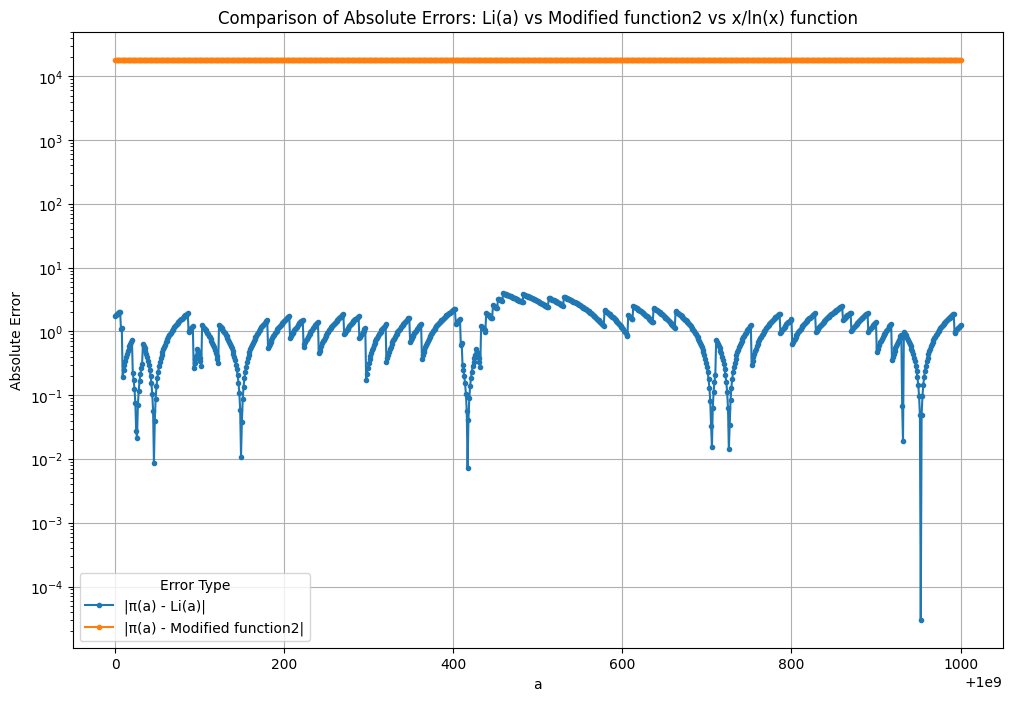

In [114]:
plt.figure(figsize=(12, 8))
plt.semilogy(a_values, mod_errors,marker='.', label='|π(a) - Li(a)|')
plt.semilogy(a_values, mod_errors2,marker='.', label='|π(a) - Modified function2|')
#plt.semilogy(a_values, mod_ln,marker=".", label='|π(a) - x/lnx|')
#plt.semilogy(a_values, mod_ln_ln2,marker=".", label='|π(a) - x/lnx^2|')

plt.title('Comparison of Absolute Errors: Li(a) vs Modified function2 vs x/ln(x) function')
plt.xlabel('a')
plt.ylabel('Absolute Error')
plt.legend(title='Error Type')
plt.grid(True)
# Save the plot as a PNG file
plt.savefig('error_comparison_plot.png', dpi=300, bbox_inches='tight')

# Display the plot (optional, if you're running this in an environment that can show plots)
plt.show()